In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

sns.set_style('white')

In [2]:
X, y = make_blobs(n_samples=849, centers=6, n_features=2, cluster_std=5)

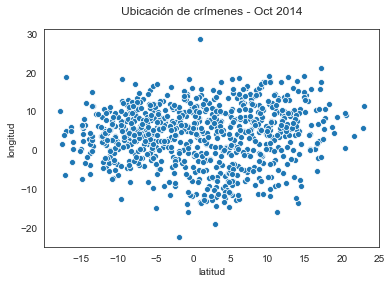

In [3]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes - Oct 2014', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(X[:,0], X[:,1], ax=ax);

In [4]:
latitud = pd.Series(X[:, 0], name='latitud')
longitud = pd.Series(X[:, 1], name='longitud')

df = pd.concat([latitud, longitud], axis=1)

df

,latitud,longitud
0,-15.068712,0.157991
1,-4.065913,12.491768
2,3.141179,-12.090601
3,8.806998,14.316892
4,-5.773641,15.487286
...,...,...
844,-4.785834,16.983806
845,-2.483657,11.532328
846,5.210416,-6.196547
847,6.204296,10.320582


In [5]:
codes = []

for i in range(df.shape[0]):
    num = int(np.random.rand() * 10)
    codes.append(num)

df['codigo_crimen'] = codes

In [6]:
df

,latitud,longitud,codigo_crimen
0,-15.068712,0.157991,8
1,-4.065913,12.491768,0
2,3.141179,-12.090601,1
3,8.806998,14.316892,8
4,-5.773641,15.487286,3
...,...,...,...
844,-4.785834,16.983806,3
845,-2.483657,11.532328,0
846,5.210416,-6.196547,2
847,6.204296,10.320582,6


In [7]:
df = df[['codigo_crimen', 'latitud', 'longitud']]

In [8]:
df.to_csv('../Datasets/crimenes_locacion-1.csv', index=False)

In [9]:
k_means = KMeans(n_clusters=8, max_iter=10000)

In [10]:
k_means.fit(X)

KMeans(max_iter=10000)

In [11]:
centers = k_means.cluster_centers_

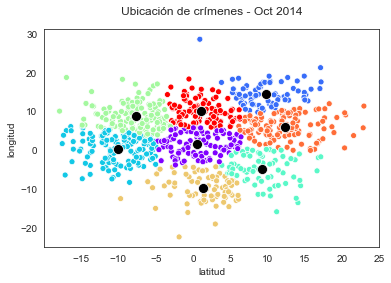

In [12]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Ubicación de crímenes - Oct 2014', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

sns.scatterplot(X[:,0], X[:,1], ax=ax, hue=k_means.predict(X), palette='rainbow');
sns.scatterplot(centers[:,0], centers[:,1], ax=ax, s=100, color='black');

ax.get_legend().remove()

In [13]:
X, y = make_blobs(n_samples=1538, centers=2, n_features=3, cluster_std=5)

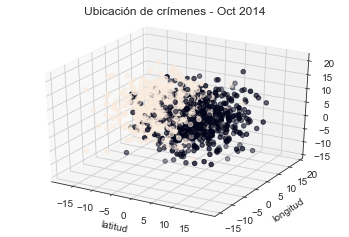

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_title('Ubicación de crímenes - Oct 2014', pad=15)
ax.set_xlabel('latitud')
ax.set_ylabel('longitud')

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
# sns.scatterplot(X[:,0], X[:,1], X[:,2], ax=ax, hue=y);

In [15]:
df = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)

In [16]:
df

,0,1,2,0
0,-0.682174,11.147758,-4.894313,0
1,-1.215150,3.695690,16.148153,1
2,-4.045647,-1.753587,6.884647,1
3,-10.563083,-0.461608,7.457603,0
4,-0.635165,-8.318222,7.863320,0
...,...,...,...,...
1533,6.092764,4.367250,3.557792,0
1534,1.910312,4.582634,7.589888,0
1535,-3.752843,3.880171,0.719919,0
1536,1.289740,3.329215,6.117342,0


In [17]:
df.columns = ['tiempo', 'antiguedad', '', 'conversion']

In [18]:
df

,tiempo,antiguedad,,conversion
0,-0.682174,11.147758,-4.894313,0
1,-1.215150,3.695690,16.148153,1
2,-4.045647,-1.753587,6.884647,1
3,-10.563083,-0.461608,7.457603,0
4,-0.635165,-8.318222,7.863320,0
...,...,...,...,...
1533,6.092764,4.367250,3.557792,0
1534,1.910312,4.582634,7.589888,0
1535,-3.752843,3.880171,0.719919,0
1536,1.289740,3.329215,6.117342,0


In [19]:
df = pd.read_csv('../Datasets/breast_cancer_wisconsin.csv', index_col=0)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [21]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [22]:
df.sample(frac=1).head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
888264,1,17.350,23.06,111.00,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,...,31.47,128.20,1218.0,0.1240,0.1486,0.1211,0.08235,0.2452,0.06515,NaN
9113455,0,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,...,25.46,100.90,689.1,0.1351,0.3549,0.4504,0.11810,0.2563,0.08174,NaN
8610862,1,20.180,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,...,31.72,170.30,1623.0,0.1639,0.6164,0.7681,0.25080,0.5440,0.09964,NaN
874217,1,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,26.36,139.20,1410.0,0.1234,0.2445,0.3538,0.15710,0.3206,0.06938,NaN
915940,0,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,NaN
864033,0,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,...,21.47,71.68,367.0,0.1467,0.1765,0.1300,0.05334,0.2533,0.08468,NaN
9110732,1,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,...,38.54,145.40,1437.0,0.1401,0.3762,0.6399,0.19700,0.2972,0.09075,NaN
875263,1,12.340,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,0.1943,...,39.34,101.70,768.9,0.1785,0.4706,0.4425,0.14590,0.3215,0.12050,NaN
91550,0,11.740,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.02639,0.1499,...,17.60,81.25,473.8,0.1073,0.2793,0.2690,0.10560,0.2604,0.09879,NaN


In [23]:
df = df.drop(columns=['Unnamed: 32'])

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression(max_iter=10000)

In [26]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [27]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

In [29]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [30]:
y_pred = logreg.predict(X_test)

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[99,  2],
       [10, 60]])

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9298245614035088
Precision: 0.967741935483871
Recall: 0.8571428571428571


In [33]:
logreg.score(X_test, y_test)

0.9298245614035088

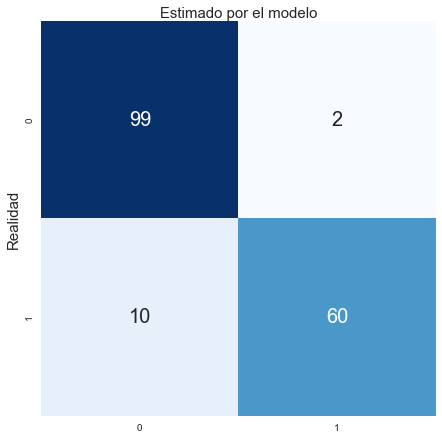

In [34]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [35]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred))
print("Especificidad:", tn / (tn + fp))

Precision: 0.967741935483871
Exactitud: 0.9298245614035088
Sensibilidad: 0.8571428571428571
Especificidad: 0.9801980198019802


In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [38]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

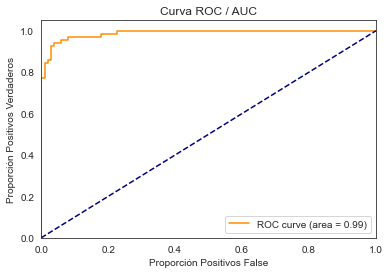

In [39]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

In [85]:
X, y = make_blobs(n_samples=749, centers=8, n_features=2, cluster_std=5)

In [86]:
latitud = pd.Series(X[:, 0], name='latitud')
longitud = pd.Series(X[:, 1], name='longitud')

df = pd.concat([latitud, longitud], axis=1)

In [87]:
p_1 = []
p_2 = []
p_3 = []
p_4 = []
user_code = []

for i in range(df.shape[0]):
    user_code.append(i + 1)
    
    num = np.random.rand()
    if num > 0.3:
        p_1.append(1)
    else:
        p_1.append(0)
        
    num = np.random.rand()
    if num > 0.9:
        p_2.append(1)
    else:
        p_2.append(0)
        
    num = np.random.rand()
    if num > 0.5:
        p_3.append(1)
    else:
        p_3.append(0)
        
    num = np.random.rand()
    if num > 0.8:
        p_4.append(1)
    else:
        p_4.append(0)

df['producto_1'] = p_1
df['producto_2'] = p_2
df['producto_3'] = p_3
df['producto_4'] = p_4
df['codigo_de_usuario'] = user_code

In [88]:
df = df[['codigo_de_usuario', 'producto_1', 'producto_2', 'producto_3', 'producto_4', 'latitud', 'longitud']]

df

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759
...,...,...,...,...,...,...,...
744,745,1,0,1,0,-15.544668,-0.881283
745,746,0,0,1,0,3.380335,1.511268
746,747,0,0,0,0,-0.186207,-5.689080
747,748,0,0,1,0,-11.387520,3.761513


In [89]:
df['producto_4'].sum()

145

In [90]:
df.to_csv('../Datasets/distribucion_usuarios-1.csv', index=False)

In [92]:
pd.read_csv('../Datasets/distribucion_usuarios-1.csv')

,codigo_de_usuario,producto_1,producto_2,producto_3,producto_4,latitud,longitud
0,1,0,0,0,0,14.277305,-5.958917
1,2,0,0,1,0,-9.958963,1.036839
2,3,0,0,1,0,7.859551,1.932572
3,4,1,1,1,1,-8.989976,6.969268
4,5,1,0,0,0,-6.641690,-0.777759
...,...,...,...,...,...,...,...
744,745,1,0,1,0,-15.544668,-0.881283
745,746,0,0,1,0,3.380335,1.511268
746,747,0,0,0,0,-0.186207,-5.689080
747,748,0,0,1,0,-11.387520,3.761513
